In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Loan.csv')

In [4]:
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [5]:
data.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [6]:
data.drop(columns=['ApplicationDate','NumberOfCreditInquiries', 'NumberOfOpenCreditLines', 'DebtToIncomeRatio', 
                   'PaymentHistory', 'LengthOfCreditHistory', 'CheckingAccountBalance', 
                   'MonthlyIncome', 'UtilityBillsPaymentHistory', 'BaseInterestRate'], inplace=True)

In [7]:
data.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,BankruptcyHistory,...,SavingsAccountBalance,TotalAssets,TotalLiabilities,JobTenure,NetWorth,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,2.000000e+04,2.000000e+04,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,0.052400,...,4946.052150,9.696440e+04,3.625241e+04,5.002650,7.229432e+04,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,0.222838,...,6604.887477,1.207999e+05,4.725151e+04,2.236804,1.179200e+05,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,73.000000,2.098000e+03,3.720000e+02,0.000000,1.000000e+03,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,0.000000,...,1541.750000,3.118025e+04,1.119675e+04,3.000000,8.734750e+03,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,0.000000,...,2986.000000,6.069900e+04,2.220300e+04,5.000000,3.285550e+04,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,0.000000,...,5873.250000,1.174052e+05,4.314650e+04,6.000000,8.882550e+04,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,1.000000,...,200089.000000,2.619627e+06,1.417302e+06,16.000000,2.603208e+06,0.446787,10892.629520,4.647657,1.000000,84.000000


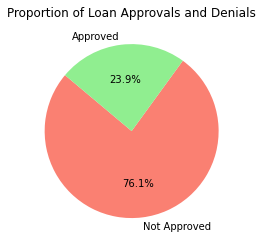

In [8]:
approval_counts = data['LoanApproved'].value_counts()
labels = ['Not Approved', 'Approved']  # Adjust labels to match 0 = Not Approved, 1 = Approved

plt.pie(approval_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['salmon', 'lightgreen'])
plt.title('Proportion of Loan Approvals and Denials')
plt.show()


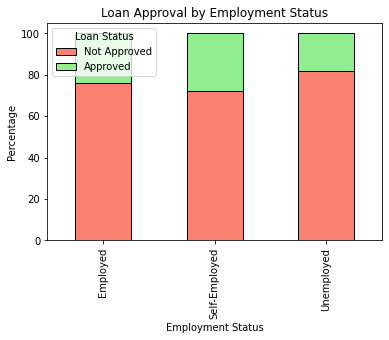

In [9]:
# Creating a crosstab for employment status and loan approval
employment_approval = pd.crosstab(data['EmploymentStatus'], data['LoanApproved'], normalize='index') * 100
employment_approval.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'], edgecolor='black')
plt.title('Loan Approval by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Percentage')
plt.legend(['Not Approved', 'Approved'], title='Loan Status')
plt.show()

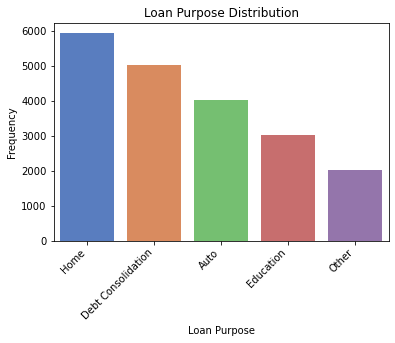

In [10]:
sns.countplot(x='LoanPurpose', data=data, palette='muted', order=data['LoanPurpose'].value_counts().index)
plt.title('Loan Purpose Distribution')
plt.xlabel('Loan Purpose')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

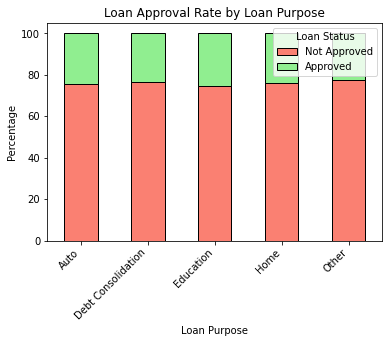

In [11]:
# Loan Purpose vs. Approval Status
loan_purpose_approval = pd.crosstab(data['LoanPurpose'], data['LoanApproved'], normalize='index') * 100
loan_purpose_approval.plot(kind='bar', stacked=True, color=['salmon', 'lightgreen'], edgecolor='black')
plt.title('Loan Approval Rate by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage')
plt.legend(['Not Approved', 'Approved'], title='Loan Status')
plt.xticks(rotation=45, ha='right')
plt.show()

In [12]:
# Encode categorical variables
categorical_columns = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']
data = pd.get_dummie s(data, columns=categorical_columns, drop_first=True)

In [13]:
# Encode the target variable
label_encoder = LabelEncoder()
data['LoanApproved'] = label_encoder.fit_transform(data['LoanApproved'])

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Drop non-numeric columns and the target variable 'LoanApproved'
numeric_features = data.select_dtypes(include=[float, int]).drop(columns=['LoanApproved'], errors='ignore')

# Drop rows with NaN values to avoid issues in VIF calculation
numeric_features = numeric_features.dropna()

# Compute the VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_features.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

# Display VIF values
print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)

Variance Inflation Factor (VIF) for each feature:
                      Feature         VIF
0                         Age  324.473274
1                AnnualIncome    7.014298
2                 CreditScore   97.361311
3                  Experience   86.908999
4                  LoanAmount   15.781937
5                LoanDuration   13.458958
6          NumberOfDependents    2.194872
7         MonthlyDebtPayments    5.157632
8   CreditCardUtilizationRate    4.325189
9           BankruptcyHistory    1.388419
10       PreviousLoanDefaults    1.290487
11      SavingsAccountBalance    1.559983
12                TotalAssets   65.366074
13           TotalLiabilities    2.671892
14                  JobTenure    5.965031
15                   NetWorth   55.914712
16               InterestRate   68.572929
17         MonthlyLoanPayment   14.187215
18     TotalDebtToIncomeRatio    6.829938
19                  RiskScore   96.325057


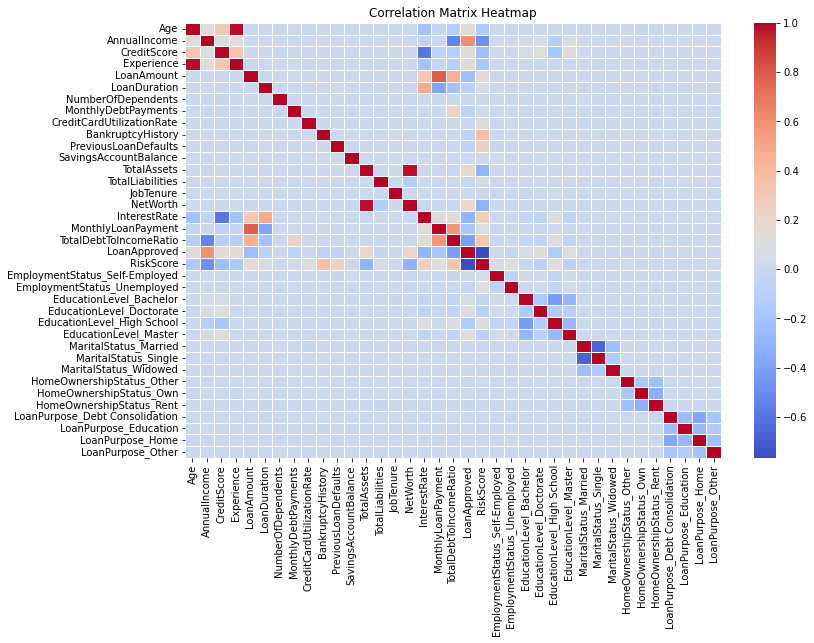

In [15]:
# Compute the correlation matrix
correlation_matrix = data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [16]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your data
df = data.copy()

# Step 1: Drop selected features
features_to_remove = ['Age', 'TotalAssets', 'CreditScore', 'InterestRate', 'MonthlyLoanPayment']
df_reduced = df.drop(columns=features_to_remove)

# Step 2: Recalculate VIF for the reduced dataset
def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

# Drop any non-numeric columns (if any) for VIF calculation
df_numeric = df_reduced.select_dtypes(include=['float64', 'int64'])

# Calculate VIF
vif_results = calculate_vif(df_numeric)
print(vif_results)


                      Feature        VIF
0                AnnualIncome   7.287560
1                  Experience   3.408780
2                  LoanAmount   7.067612
3                LoanDuration   6.349540
4          NumberOfDependents   2.188662
5         MonthlyDebtPayments   5.049240
6   CreditCardUtilizationRate   4.374957
7           BankruptcyHistory   1.155545
8        PreviousLoanDefaults   1.172317
9       SavingsAccountBalance   1.557862
10           TotalLiabilities   1.617111
11                  JobTenure   5.885640
12                   NetWorth   1.476197
13     TotalDebtToIncomeRatio   5.791365
14               LoanApproved   2.706013
15                  RiskScore  25.577016


In [17]:
data=data.drop(columns=['Age', 'CreditScore', 'TotalAssets', 'InterestRate', 'MonthlyLoanPayment'])

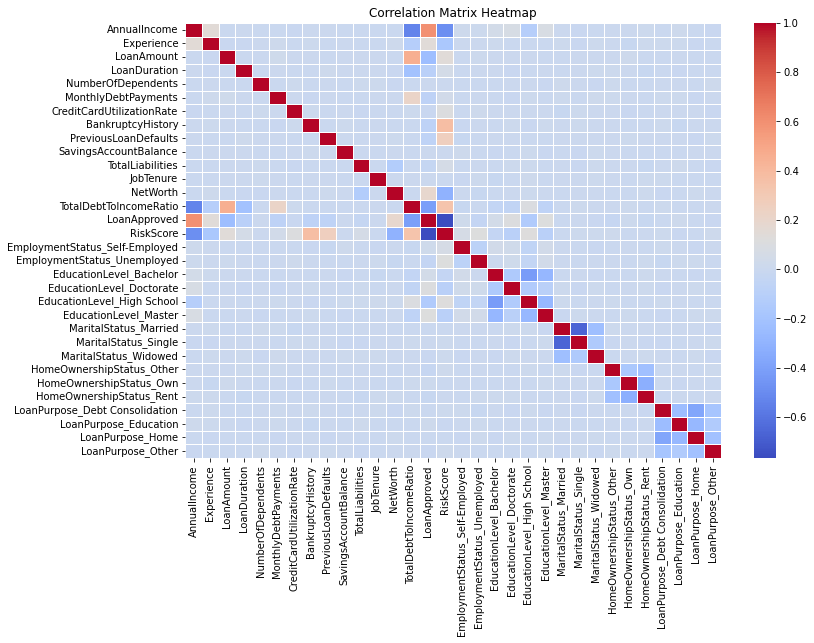

In [18]:
# Compute the correlation matrix
correlation_matrix = data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [19]:
import pandas as pd

# Assuming `df` is your DataFrame with all features and 'LoanApproved' as a column.
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Get correlations with 'LoanApproved'
loan_approved_correlation = correlation_matrix["LoanApproved"]

# Set a threshold for minimum correlation to keep (e.g., 0.2)
threshold = 0.1

# Identify features to keep based on correlation threshold
features_to_keep = loan_approved_correlation[loan_approved_correlation.abs() > threshold].index.tolist()

# Create a new DataFrame with only the selected features
df_reduced = data[features_to_keep]

print("Features retained based on correlation with LoanApproved:", features_to_keep)
print(df_reduced.head())

Features retained based on correlation with LoanApproved: ['AnnualIncome', 'Experience', 'LoanAmount', 'NetWorth', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore', 'EducationLevel_Doctorate', 'EducationLevel_High School', 'EducationLevel_Master']
   AnnualIncome  Experience  LoanAmount  NetWorth  TotalDebtToIncomeRatio  \
0         39948          22       13152    126928                0.181077   
1         39709          15       26045     43609                0.389852   
2         40724          26       17627      5205                0.462157   
3         69084          34       37898     99452                0.313098   
4        103264          17        9184    227019                0.070210   

   LoanApproved  RiskScore  EducationLevel_Doctorate  \
0             0       49.0                         0   
1             0       52.0                         0   
2             0       52.0                         0   
3             0       54.0                         0   
4   

In [20]:
from sklearn.preprocessing import StandardScaler

# Select the columns to scale
columns_to_scale = ['AnnualIncome', 'Experience', 'LoanAmount', 'NetWorth', 'TotalDebtToIncomeRatio', 'RiskScore']

# Initialize the scaler
scaler = StandardScaler()

# Scale the selected columns and replace them in the DataFrame
df_reduced[columns_to_scale] = scaler.fit_transform(df_reduced[columns_to_scale])

# Display the scaled DataFrame (optional)
print(df_reduced.head())

   AnnualIncome  Experience  LoanAmount  NetWorth  TotalDebtToIncomeRatio  \
0     -0.476172    0.395637   -0.873672  0.463323               -0.652388   
1     -0.482095   -0.222926    0.086551 -0.243267               -0.036378   
2     -0.456940    0.749102   -0.540390 -0.568953                0.176962   
3      0.245912    1.456031    0.969319  0.230312               -0.262848   
4      1.093004   -0.046193   -1.169194  1.312148               -0.979511   

   LoanApproved  RiskScore  EducationLevel_Doctorate  \
0             0  -0.227149                         0   
1             0   0.158551                         0   
2             0   0.158551                         0   
3             0   0.415684                         0   
4             1  -1.898515                         0   

   EducationLevel_High School  EducationLevel_Master  
0                           0                      1  
1                           0                      0  
2                           0      

C:\Users\PRAGYA\AppData\Local\Temp\ipykernel_14312\46819956.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced[columns_to_scale] = scaler.fit_transform(df_reduced[columns_to_scale])


In [21]:
# Separate features and target variable
X = df_reduced.drop(columns=['LoanApproved'])  # Features
y = df_reduced['LoanApproved']                 # Target

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize logistic regression with balanced class weights
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print(f"AUC-ROC: {train_auc:.2f}")

# Testing metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print(f"AUC-ROC: {test_auc:.2f}")

Training Metrics:
Accuracy: 0.98
Precision: 0.93
Recall: 0.98
F1 Score: 0.95
AUC-ROC: 1.00

Testing Metrics:
Accuracy: 0.98
Precision: 0.93
Recall: 0.98
F1 Score: 0.95
AUC-ROC: 1.00


In [24]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_train_pred_clf = rf_clf.predict(X_train)
y_test_pred_clf = rf_clf.predict(X_test)

In [26]:
# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred_clf)
train_precision = precision_score(y_train, y_train_pred_clf)
train_recall = recall_score(y_train, y_train_pred_clf)
train_f1 = f1_score(y_train, y_train_pred_clf)
train_auc = roc_auc_score(y_train, rf_clf.predict_proba(X_train)[:, 1])

print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print(f"AUC-ROC: {train_auc:.2f}")

# Testing metrics
test_accuracy = accuracy_score(y_test, y_test_pred_clf)
test_precision = precision_score(y_test, y_test_pred_clf)
test_recall = recall_score(y_test, y_test_pred_clf)
test_f1 = f1_score(y_test, y_test_pred_clf)
test_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print(f"AUC-ROC: {test_auc:.2f}")

Training Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
AUC-ROC: 1.00

Testing Metrics:
Accuracy: 0.98
Precision: 0.97
Recall: 0.96
F1 Score: 0.97
AUC-ROC: 1.00


In [27]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42, probability=True)

# Fit the model on the training data
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [28]:
y_train_pred_svm = svm_classifier.predict(X_train)
y_test_pred_svm = svm_classifier.predict(X_test)

In [29]:
# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred_svm)
train_precision = precision_score(y_train, y_train_pred_svm)
train_recall = recall_score(y_train, y_train_pred_svm)
train_f1 = f1_score(y_train, y_train_pred_svm)
train_auc = roc_auc_score(y_train, svm_classifier.predict_proba(X_train)[:, 1])

print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")
print(f"F1 Score: {train_f1:.2f}")
print(f"AUC-ROC: {train_auc:.2f}")

# Testing metrics
test_accuracy = accuracy_score(y_test, y_test_pred_svm)
test_precision = precision_score(y_test, y_test_pred_svm)
test_recall = recall_score(y_test, y_test_pred_svm)
test_f1 = f1_score(y_test, y_test_pred_svm)
test_auc = roc_auc_score(y_test, svm_classifier.predict_proba(X_test)[:, 1])

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")
print(f"AUC-ROC: {test_auc:.2f}")

Training Metrics:
Accuracy: 0.98
Precision: 0.97
Recall: 0.96
F1 Score: 0.96
AUC-ROC: 1.00

Testing Metrics:
Accuracy: 0.98
Precision: 0.96
Recall: 0.95
F1 Score: 0.96
AUC-ROC: 1.00


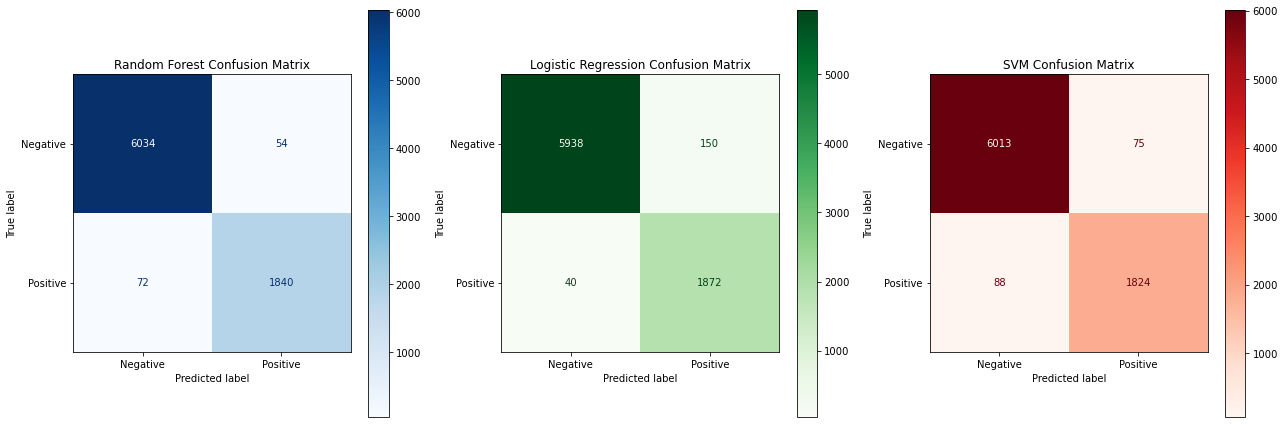

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Compute confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_test_pred_clf)

# 2. Compute confusion matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_test_pred)

# 3. Compute confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_test_pred_svm)

# 4. Plotting confusion matrices

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Random Forest Confusion Matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Negative', 'Positive'])
disp_rf.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Random Forest Confusion Matrix')

# Plot Logistic Regression Confusion Matrix
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=['Negative', 'Positive'])
disp_logreg.plot(ax=axes[1], cmap='Greens', values_format='d')
axes[1].set_title('Logistic Regression Confusion Matrix')

# Plot SVM Confusion Matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Negative', 'Positive'])
disp_svm.plot(ax=axes[2], cmap='Reds', values_format='d')
axes[2].set_title('SVM Confusion Matrix')

plt.tight_layout()
plt.show()


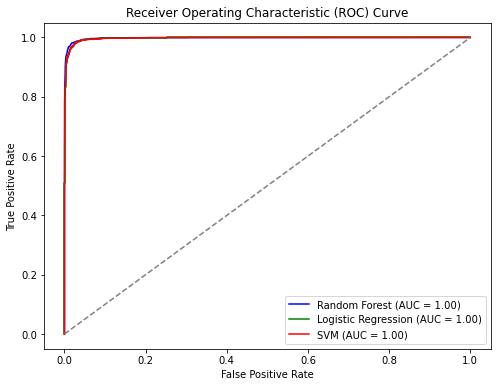

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class (class 1) for each model
rf_train_prob = rf_clf.predict_proba(X_train)[:, 1]
rf_test_prob = rf_clf.predict_proba(X_test)[:, 1]

logreg_train_prob = model.predict_proba(X_train)[:, 1]
logreg_test_prob = model.predict_proba(X_test)[:, 1]

svm_train_prob = svm_classifier.predict_proba(X_train)[:, 1]
svm_test_prob = svm_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_test_prob)
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_test_prob)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_test_prob)

# Calculate AUC for each model
roc_auc_rf = roc_auc_score(y_test, rf_test_prob)
roc_auc_logreg = roc_auc_score(y_test, logreg_test_prob)
roc_auc_svm = roc_auc_score(y_test, svm_test_prob)

# Plot ROC curves
plt.figure(figsize=(8, 6))

# Plot each model's ROC curve
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_logreg, tpr_logreg, color='green', label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', label=f'SVM (AUC = {roc_auc_svm:.2f})')

# Plot diagonal line (representing random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels, title, and legend
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()


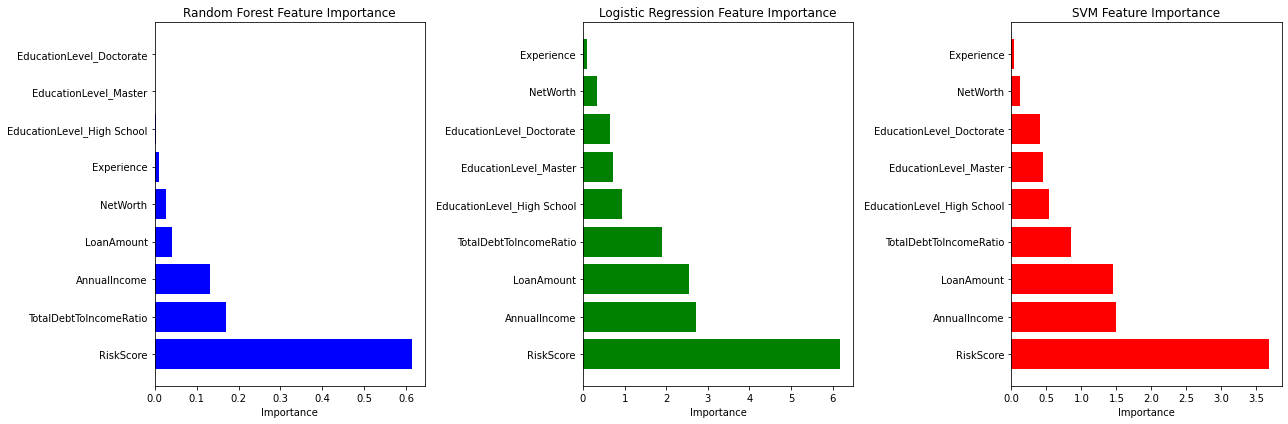

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Feature Importance for Random Forest
rf_importances = rf_clf.feature_importances_

# 2. Feature Importance for Logistic Regression (using coefficients)
logreg_importances = np.abs(model.coef_[0])  # Taking absolute values of coefficients

# 3. Feature Importance for SVM (for linear SVM, using coefficients)
svm_importances = np.abs(svm_classifier.coef_[0])  # For linear SVM, coefficients represent feature importance

# Create a DataFrame for the feature names and their importance
features = X_train.columns  # Assuming your data is a pandas DataFrame with column names

# Combine all feature importances into one DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Random Forest': rf_importances,
    'Logistic Regression': logreg_importances,
    'SVM': svm_importances
})

# Sort by feature importance for each model
importance_df_sorted_rf = importance_df.sort_values(by='Random Forest', ascending=False)
importance_df_sorted_logreg = importance_df.sort_values(by='Logistic Regression', ascending=False)
importance_df_sorted_svm = importance_df.sort_values(by='SVM', ascending=False)

# 4. Plotting Feature Importance
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Random Forest Feature Importance
axes[0].barh(importance_df_sorted_rf['Feature'], importance_df_sorted_rf['Random Forest'], color='blue')
axes[0].set_title('Random Forest Feature Importance')
axes[0].set_xlabel('Importance')

# Plot Logistic Regression Feature Importance
axes[1].barh(importance_df_sorted_logreg['Feature'], importance_df_sorted_logreg['Logistic Regression'], color='green')
axes[1].set_title('Logistic Regression Feature Importance')
axes[1].set_xlabel('Importance')

# Plot SVM Feature Importance
axes[2].barh(importance_df_sorted_svm['Feature'], importance_df_sorted_svm['SVM'], color='red')
axes[2].set_title('SVM Feature Importance')
axes[2].set_xlabel('Importance')

plt.tight_layout()
plt.show()